In [ ]:
!pip install -q kaggle

In [ ]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('username')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

 93% 187M/202M [00:01<00:00, 141MB/s]
100% 202M/202M [00:01<00:00, 139MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fraud-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('/content/fraudTrain.csv')
test_data = pd.read_csv('/content/fraudTest.csv')

In [ ]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [ ]:
test_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
test_data['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [ ]:
train_data.duplicated().any()

False

In [ ]:
test_data.duplicated().any()

False

In [ ]:
train_data.sample(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
245121,245121,2019-05-03 05:02:23,30263540414123,"fraud_Tillman, Dickinson and Labadie",gas_transport,66.27,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,5fc308a63c41e7ff68ec8f1db88e07b9,1336021343,38.177538,-111.700709,0
577766,577766,2019-09-01 22:27:25,3589289942931264,fraud_Stiedemann Ltd,food_dining,8.62,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,81e39a168372cb03fbd6c5787d4b30f8,1346538445,44.305514,-96.656839,0
353021,353021,2019-06-14 21:12:17,4890424426862856940,"fraud_Bernhard, Grant and Langworth",shopping_pos,432.04,Jeremy,Whitney,M,0371 Aimee Neck Suite 856,...,38.5662,-121.3286,757530,Magazine features editor,1979-04-30,4829d900e4c620794be32ef72a03f438,1339708337,37.984732,-120.581417,0
873224,873224,2019-12-21 01:45:11,4294040533480516,"fraud_Reilly, Heaney and Cole",gas_transport,40.06,Gail,Weaver,F,979 Stewart Lake,...,33.4130,-81.6900,2206,Biomedical scientist,1986-12-31,e1a96cb5bfce49add4ecabba6bd88f6f,1356054311,33.971440,-80.774405,0
675441,675441,2019-10-14 17:23:45,3529597930342630,fraud_Eichmann-Kilback,home,60.07,Melissa,Rodriguez,F,81708 Christopher Plaza,...,42.8948,-74.8209,824,Travel agency manager,1985-09-01,47b6277c98ef04c2f702a5b8e1dc4aa3,1350235425,43.841822,-73.888354,0
711149,711149,2019-10-30 19:46:14,676234256292,fraud_Goldner-Lemke,entertainment,71.44,David,Vasquez,M,06539 Gregory Mountains Suite 029,...,34.2980,-114.1560,126,Marketing executive,1992-10-07,c7e9e53ffadece7ba74077fe04568ae4,1351626374,34.612391,-114.961650,0
12765,12765,2019-01-08 08:40:20,375904527651269,fraud_Stamm-Witting,shopping_net,311.38,Ryan,Cook,M,75952 Wilson Course,...,40.4591,-98.5551,463,"Nurse, mental health",1948-05-31,3b94fd4615fea7f63c2b7d5618580ceb,1326012020,40.747440,-98.123761,0
151578,151578,2019-03-22 23:41:31,3562264947797243,fraud_Powlowski-Weimann,food_dining,32.11,Anthony,Velasquez,M,609 Hunt Grove,...,37.6047,-85.4251,301,"Research officer, political party",1967-03-17,24eebac83a4bf4683b6a06155a022032,1332459691,37.644154,-84.784677,0
339423,339423,2019-06-09 16:37:58,3531129874770000,fraud_Macejkovic-Lesch,shopping_pos,393.74,Shelby,Mitchell,F,974 Cindy Stream,...,43.8065,-73.0882,5895,"Scientist, marine",1975-07-13,73cf5658b9faabaee92f6cc94db6418c,1339259878,44.460265,-72.272279,0
942446,942446,2020-01-11 19:28:44,676309913934,fraud_White and Sons,home,46.06,Robert,Martinez,M,3683 Parrish Circles,...,38.2352,-104.6600,151815,Further education lecturer,1988-01-04,7c0cce55b54e31bd656231c4e1868469,1357932524,38.213907,-105.108934,0


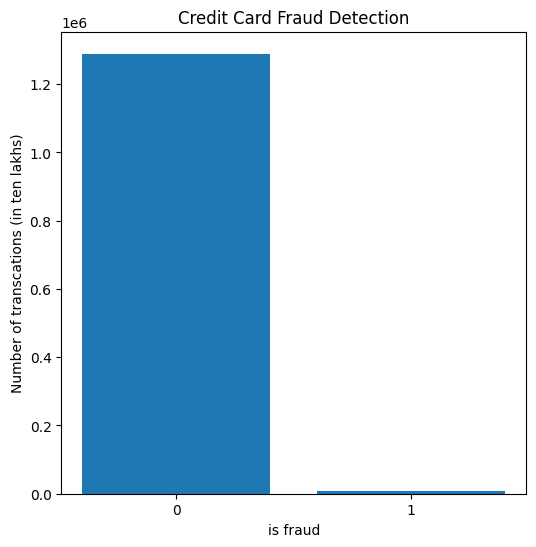

In [ ]:
import matplotlib.pyplot as plt


is_fraud = train_data['is_fraud'].value_counts()

plt.figure(figsize=(6, 6))

# Bar plot
plt.bar(is_fraud.index.astype(str), is_fraud)
plt.xlabel('is fraud')
plt.ylabel('Number of transcations (in ten lakhs)')
plt.title('Credit Card Fraud Detection')


plt.show()


In [ ]:
frauds = train_data[train_data.is_fraud == 1]
not_frauds = train_data[train_data.is_fraud == 0]

In [ ]:
frauds.shape

(7506, 23)

In [ ]:
not_frauds.shape

(1289169, 23)

In [ ]:
frauds.sample(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
624114,624114,2019-09-22 14:34:01,3534093764340240,fraud_McGlynn-Jaskolski,misc_pos,48.03,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,26522e1a2dd2b386688fd731419dc6ad,1348324441,46.984508,-111.504198,1
64539,64539,2019-02-07 22:16:13,577891228931,fraud_Pacocha-O'Reilly,grocery_pos,257.63,Lisa,Carpenter,F,48437 English Ways Suite 579,...,45.3304,-118.0852,16955,"Engineer, site",1961-06-16,f16761e504073ef61657c186a9daba0b,1328652973,46.026023,-117.409519,1
290209,290209,2019-05-22 23:13:03,4996263498048679,fraud_Bechtelar-Rippin,food_dining,124.71,Kendra,King,F,154 Hernandez Keys,...,41.9404,-124.1587,1930,Web designer,1983-06-13,2a601b694c8b9fece6301e84361a11c0,1337728383,42.871306,-124.647864,1
170043,170043,2019-03-30 23:14:28,3533012926413100,fraud_Daugherty LLC,kids_pets,15.95,Megan,Bernard,F,128 Nathan Ramp,...,43.2237,-75.1612,1684,IT trainer,1994-03-01,06cdff431df633f5c6b139f3d6495dee,1333149268,42.910501,-74.600564,1
774729,774729,2019-11-27 23:29:18,501802953619,fraud_Terry-Huel,shopping_net,1028.63,Robert,Flores,M,3277 Fields Meadows Apt. 790,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,e94b84095f05b16befca3739515eeded,1354058958,41.079434,-122.989405,1
237146,237146,2019-04-29 03:58:02,342351256941125,fraud_Gutmann Ltd,grocery_net,12.43,Rebecca,Obrien,F,5619 Mendoza Inlet,...,33.1194,-83.8235,3343,Theatre manager,1990-06-08,d5bec8b265bbb126192d85a3644f47d2,1335671882,33.237073,-84.155467,1
1019936,1019936,2020-02-25 08:44:31,4839043708100390,"fraud_Moen, Reinger and Murphy",grocery_pos,288.03,Meredith,Campbell,F,043 Hanson Turnpike,...,41.1826,-92.3097,1583,Geochemist,1999-06-28,3ff06a93c7860415d56602d42e9803e8,1361781871,41.325967,-92.077304,1
727254,727254,2019-11-06 22:11:55,2252055259910912,fraud_Rutherford-Mertz,grocery_pos,314.30,Jason,Hernandez,M,220 Frank Gardens,...,44.6437,-90.1031,828,Arts development officer,1991-08-19,db8d3a2c8f5f6efdc501d570d7a59fd8,1352239915,45.088716,-90.562853,1
268625,268625,2019-05-13 02:22:54,630451534402,fraud_Bradtke PLC,grocery_pos,341.59,Rachel,Daniels,F,561 Little Plain Apt. 738,...,46.3535,-86.6345,765,Immunologist,1972-06-12,45d55c2b5e4652765e95fe63b41ebe36,1336875774,46.611634,-86.882529,1
1129726,1129726,2020-04-14 23:35:30,4400011257587661852,fraud_Emmerich-Rau,personal_care,20.56,Marissa,Powell,F,474 Allen Haven,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,c21965f7ef72f873a57bc07030f1a326,1365982530,42.202840,-98.759135,1


In [ ]:
not_frauds.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


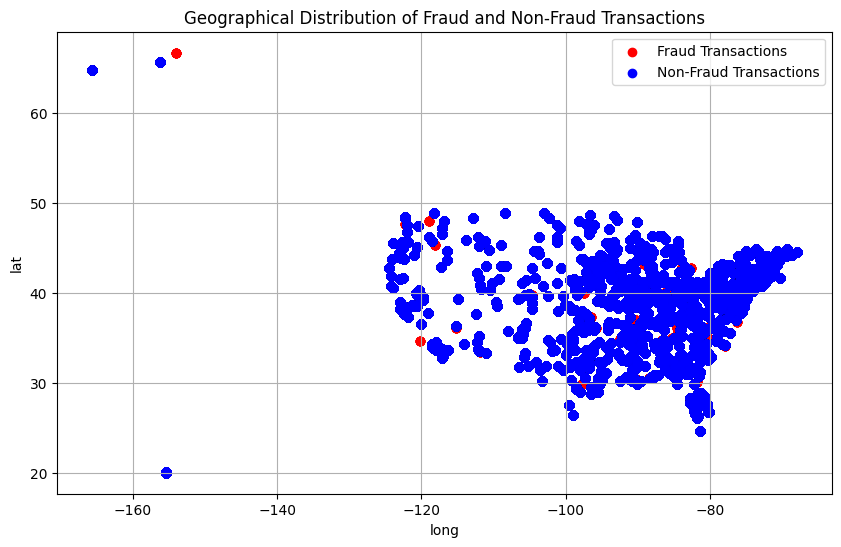

In [ ]:
# plt.figure(figsize=(10, 6))

# # Scatter plot for fraud transactions (in red)
# plt.scatter(frauds['long'], frauds['lat'], color='red', label='Fraud Transactions')

# # Scatter plot for non-fraud transactions (in blue)
# plt.scatter(not_frauds['long'], not_frauds['lat'], color='blue', label='Non-Fraud Transactions')

# # Add labels and title
# plt.xlabel('long')
# plt.ylabel('lat')
# plt.title('Geographical Distribution of Fraud and Non-Fraud Transactions')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.grid()
# plt.show()

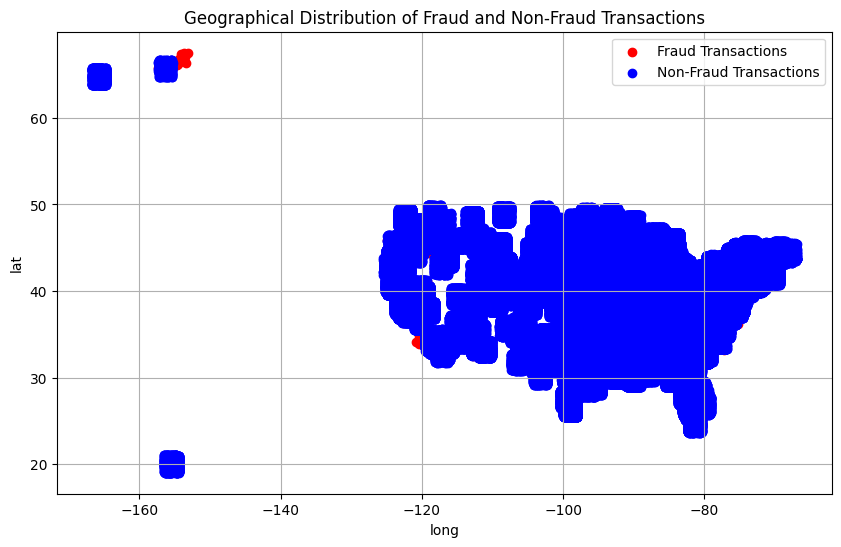

In [ ]:
# plt.figure(figsize=(10, 6))

# # Scatter plot for fraud transactions (in red)
# plt.scatter(frauds['merch_long'], frauds['merch_lat'], color='red', label='Fraud Transactions')

# # Scatter plot for non-fraud transactions (in blue)
# plt.scatter(not_frauds['merch_long'], not_frauds['merch_lat'], color='blue', label='Non-Fraud Transactions')

# # Add labels and title
# plt.xlabel('long')
# plt.ylabel('lat')
# plt.title('Geographical Distribution of Fraud and Non-Fraud Transactions')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.grid()
# plt.show()

In [ ]:
# frauds['cc_num'].duplicated().sum()

6744

In [ ]:
# not_frauds['cc_num'].duplicated().sum()

1288261

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
new_train = train_data.drop(['Unnamed: 0', 'trans_date_trans_time','cc_num','amt','first','last','street','city','state','zip','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)

In [ ]:
new_train.head()

,merchant,category,gender,job,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,F,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,Special educational needs teacher,0
2,fraud_Lind-Buckridge,entertainment,M,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Patent attorney,0
4,fraud_Keeling-Crist,misc_pos,M,Dance movement psychotherapist,0


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
new_train['merchant'] = le.fit_transform(new_train['merchant'])
new_train['category'] = le.fit_transform(new_train['category'])
new_train['gender'] = le.fit_transform(new_train['gender'])
new_train['job'] = le.fit_transform(new_train['job'])



In [ ]:
new_train.head()

,merchant,category,gender,job,is_fraud
0,514,8,0,370,0
1,241,4,0,428,0
2,390,0,1,307,0
3,360,2,1,328,0
4,297,9,1,116,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_train.duplicated().any()

True

In [ ]:
new_train.drop_duplicates(inplace=True)

In [ ]:
new_train.shape

(374557, 5)

In [ ]:
new_train['is_fraud'].value_counts()

0    367224
1      7333
Name: is_fraud, dtype: int64

In [ ]:
X = new_train.drop(['is_fraud'],axis=1)

In [ ]:
Y = new_train['is_fraud']

In [ ]:
X.shape

(374557, 4)

In [ ]:
Y.shape

(374557,)

In [ ]:
X_train, X_val, Y_train, Y_val =  train_test_split(X,Y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_val)
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     91752
           1       0.00      0.00      0.00      1888

    accuracy                           0.97     93640
   macro avg       0.49      0.49      0.49     93640
weighted avg       0.96      0.97      0.96     93640

[[90454  1298]
 [ 1882     6]]


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred2 = LR.predict(X_val)


print(classification_report(Y_val, y_pred2))
print(confusion_matrix(Y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     91752
           1       0.00      0.00      0.00      1888

    accuracy                           0.98     93640
   macro avg       0.49      0.50      0.49     93640
weighted avg       0.96      0.98      0.97     93640

[[91752     0]
 [ 1888     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 = dt.predict(X_val)

print(classification_report(Y_val, y_pred3))
print(confusion_matrix(Y_val, y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     91752
           1       0.02      0.02      0.02      1888

    accuracy                           0.96     93640
   macro avg       0.50      0.50      0.50     93640
weighted avg       0.96      0.96      0.96     93640

[[89879  1873]
 [ 1842    46]]


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [ ]:
X_res.shape

(734448, 4)

In [ ]:
Y_res.value_counts()

0    367224
1    367224
Name: is_fraud, dtype: int64

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(X_res,Y_res,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_val)


print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.49      0.55     92093
           1       0.58      0.73      0.65     91519

    accuracy                           0.61    183612
   macro avg       0.61      0.61      0.60    183612
weighted avg       0.61      0.61      0.60    183612

[[44911 47182]
 [25107 66412]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred2 = dt.predict(X_val)

print(classification_report(Y_val, y_pred2))
print(confusion_matrix(Y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     92093
           1       0.92      0.95      0.94     91519

    accuracy                           0.94    183612
   macro avg       0.94      0.94      0.94    183612
weighted avg       0.94      0.94      0.94    183612

[[84808  7285]
 [ 4463 87056]]


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred3 = rf.predict(X_val)
print(classification_report(Y_val, y_pred3))
print(confusion_matrix(Y_val, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     92093
           1       0.92      0.96      0.94     91519

    accuracy                           0.94    183612
   macro avg       0.94      0.94      0.94    183612
weighted avg       0.94      0.94      0.94    183612

[[84727  7366]
 [ 3584 87935]]


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
new_test = test_data.drop(['Unnamed: 0', 'trans_date_trans_time','cc_num','amt','first','last','street','city','state','zip','lat','long','city_pop','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)

In [ ]:
le = LabelEncoder()
new_test['merchant'] = le.fit_transform(new_test['merchant'])
new_test['category'] = le.fit_transform(new_test['category'])
new_test['gender'] = le.fit_transform(new_test['gender'])
new_test['job'] = le.fit_transform(new_test['job'])



In [ ]:
new_test.head()

,merchant,category,gender,job,is_fraud
0,319,10,1,275,0
1,591,10,0,392,0
2,611,5,0,259,0
3,222,9,1,407,0
4,292,13,1,196,0


In [ ]:
X = new_test.drop(['is_fraud'],axis=1)

In [ ]:
X

,merchant,category,gender,job
0,319,10,1,275
1,591,10,0,392
2,611,5,0,259
3,222,9,1,407
4,292,13,1,196
...,...,...,...,...
555714,507,5,1,460
555715,264,7,1,198
555716,496,7,0,294
555717,75,13,1,58


In [ ]:
new_test['pred'] = rf.predict(X)

In [ ]:
new_test

,merchant,category,gender,job,is_fraud,pred
0,319,10,1,275,0,0
1,591,10,0,392,0,0
2,611,5,0,259,0,0
3,222,9,1,407,0,0
4,292,13,1,196,0,0
...,...,...,...,...,...,...
555714,507,5,1,460,0,0
555715,264,7,1,198,0,0
555716,496,7,0,294,0,0
555717,75,13,1,58,0,0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(new_test['is_fraud'],new_test['pred'])

0.9118061466316609

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,Y_res)

RandomForestClassifier()

In [ ]:
new_test['pred_full'] = rf1.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(new_test['is_fraud'],new_test['pred_full'])

0.9147176900555857

# The final result is the accuracy score of 91.47%

In [ ]:
##OverSampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

In [ ]:
# from collections import Counter

# sampling_strategy = 0.8
# os= RandomOverSampler(sampling_strategy=sampling_strategy)
# X_train_os,y_train_os = os.fit_resample(X_train,Y_train)
# print("the number of classes before fit {}".format(Counter(Y_train)))
# print("after fit {}".format(Counter(y_train_os)))

the number of classes before fit Counter({0: 360641, 1: 5484})
after fit Counter({0: 360641, 1: 288512})


In [ ]:
# rf_clf = RandomForestClassifier(class_weight=class_weight)

In [ ]:
# rf_clf.fit(X_train_os, y_train_os)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [ ]:
# y_pred = rf_clf.predict(X_val)

In [ ]:
# print(classification_report(Y_val, y_pred))
# print(confusion_matrix(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    120132
           1       0.03      0.03      0.03      1910

    accuracy                           0.97    122042
   macro avg       0.51      0.51      0.51    122042
weighted avg       0.97      0.97      0.97    122042

[[118044   2088]
 [  1852     58]]


In [ ]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(X_train, Y_train)

In [ ]:
# print("the number of classes before fit {}".format(Counter(Y_train)))
# print("after fit {}".format(Counter(oversampled_Y)))

the number of classes before fit Counter({0: 360641, 1: 5484})
after fit Counter({0: 360641, 1: 360641})


In [ ]:
# rf_clf = RandomForestClassifier()
# rf_clf.fit(oversampled_X, oversampled_Y)
# y_pred = rf_clf.predict(X_val)


In [ ]:
# print(classification_report(Y_val, y_pred))
# print(confusion_matrix(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    120132
           1       0.04      0.08      0.06      1910

    accuracy                           0.96    122042
   macro avg       0.51      0.53      0.52    122042
weighted avg       0.97      0.96      0.96    122042

[[116692   3440]
 [  1755    155]]


In [ ]:
# from sklearn.linear_model import LogisticRegression


In [ ]:
# LR = LogisticRegression(solver='liblinear')

In [ ]:
# LR.fit(oversampled_X, oversampled_Y)
# y_pred = rf_clf.predict(X_val)


In [ ]:
# print(classification_report(Y_val, y_pred))
# print(confusion_matrix(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    120132
           1       0.04      0.08      0.06      1910

    accuracy                           0.96    122042
   macro avg       0.51      0.53      0.52    122042
weighted avg       0.97      0.96      0.96    122042

[[116692   3440]
 [  1755    155]]
